# How to use Fourier Transform to get spectra from acoustic vibrations

In this notebook, we will analyse some sounds. These sounds can be uploaded or recorded by ourselves. Here we are going to:

- Record some sounds using Audacity
- Read the audio files using the Python library *soundfile* (https://pypi.org/project/SoundFile/) 
- Find the main frequency of some given sound using Fourier Transform from the numpy library
- Play around with the resolution of the spectrum
- Compare two sounds, more specifically, compare their spectrums

In [1]:
import numpy as np
import soundfile as sf
%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
# Name of the file to be analyzed
fileName = 'Silva04.flac'

# Sample rate
data, sampleRate = sf.read(fileName)
print(data.shape, sampleRate)

# Time scale
timeScale = np.arange(data.shape[0])
print(timeScale.shape, timeScale[0:6])

# Time length (in seconds) of the recording
seconds = timeScale / sampleRate
print(seconds.shape, seconds[0:6], seconds[-1])

(2440000,) 192000
(2440000,) [0 1 2 3 4 5]
(2440000,) [0.00000000e+00 5.20833333e-06 1.04166667e-05 1.56250000e-05
 2.08333333e-05 2.60416667e-05] 12.708328125


In [3]:
class Figure():
    def __init__(self):
        self.figure, self.axes = plt.subplots()
        
    def plot(self, v1, v2=np.asarray([])):
        if v2.size:
            self.axes.plot(v1,v2)
        else:
            self.axes.plot(v1)
        plt.show()
            
    def xlabel(self, txt):
        self.axes.set_xlabel(txt)
        
    def ylabel(self, txt):
        self.axes.set_ylabel(txt)

Visualization of the sound

<IPython.core.display.Javascript object>


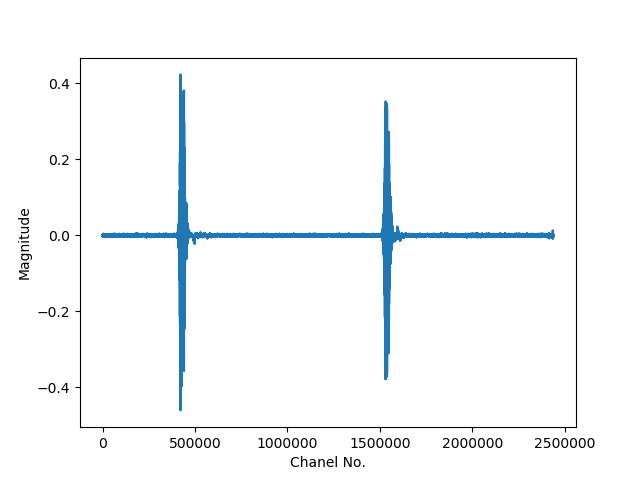

In [4]:
f1 = Figure()
f1.plot(data)
f1.xlabel('Chanel No.')
f1.ylabel('Magnitude')

<IPython.core.display.Javascript object>


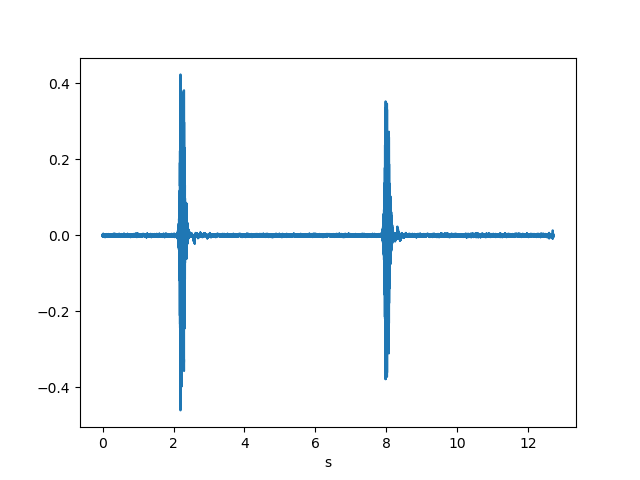

In [5]:
f2 = Figure()
f2.plot(seconds, data)
f2.xlabel('s')

When analyzing sound, it is a common practice to do it in segments. Stationarity assumptions hold in segments no larger than 25 ms. 
For this example, we will obtain a segment of 21 ms exactly after the first 8 seconds of the sound.

In [6]:
# Find 8 seconds mark
mark8s = sampleRate*8
print(mark8s)
print(2**12, 2**12/sampleRate, 's')

1536000
4096 0.021333333333333333 s


<IPython.core.display.Javascript object>


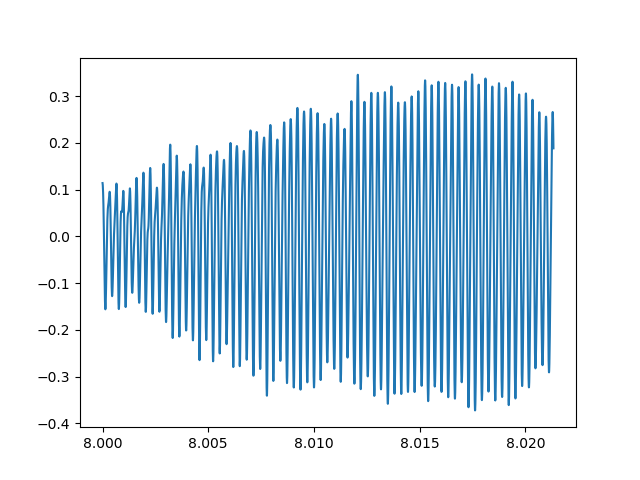

In [7]:
segment = data[mark8s:mark8s+4096]
segmentSecs = seconds[mark8s:mark8s+4096]
f2b = Figure()
f2b.plot(segmentSecs, segment)

Compute the one-dimensional discret Fourier Transform

<IPython.core.display.Javascript object>


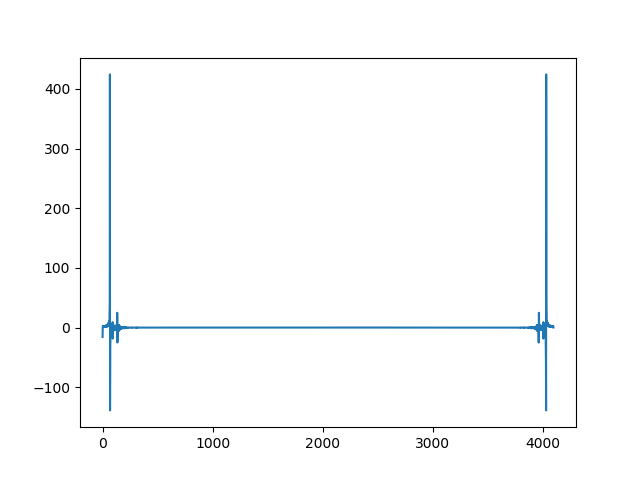

C:\Users\SOHP\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [8]:
fftSegment = np.fft.fft(segment)
f3 = Figure()
f3.plot(fftSegment)

<IPython.core.display.Javascript object>


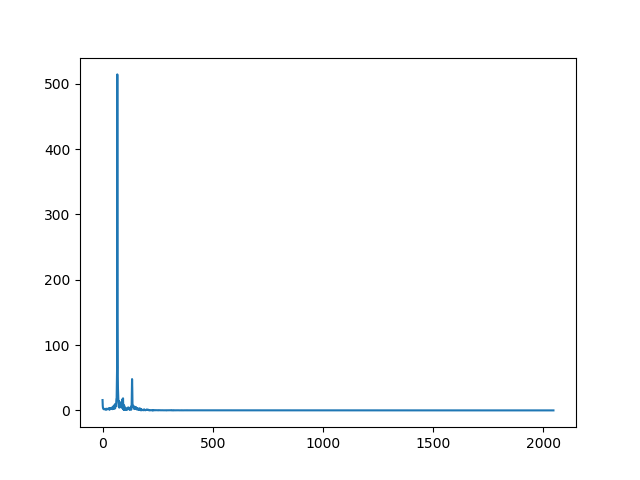

In [9]:
# Obtain the Power Spectral Density by taking the absolute value of the DFT. We will show only one side of the PSD.
psdSegment = np.absolute(fftSegment)
f4 = Figure()
f4.plot(psdSegment[0:int(4096/2)])

<IPython.core.display.Javascript object>


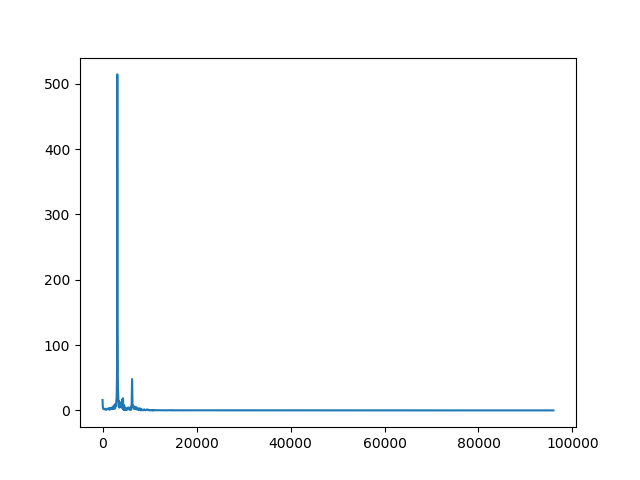

In [10]:
# Scale in 1/s = Hz
timeStep = 1/sampleRate
frequencyScale = np.fft.fftfreq(4096, timeStep)
f5 = Figure()
f5.plot(frequencyScale[0:4096//2], psdSegment[0:int(4096/2)])

To have a better picture of the frequencies, we can plot the spectrum in *log* scale. This will help us to locate in a better way where the main frequency is. Also, we can note the lack of energy after 23kHz, as that is beyond the range of a normal microphone.

<IPython.core.display.Javascript object>


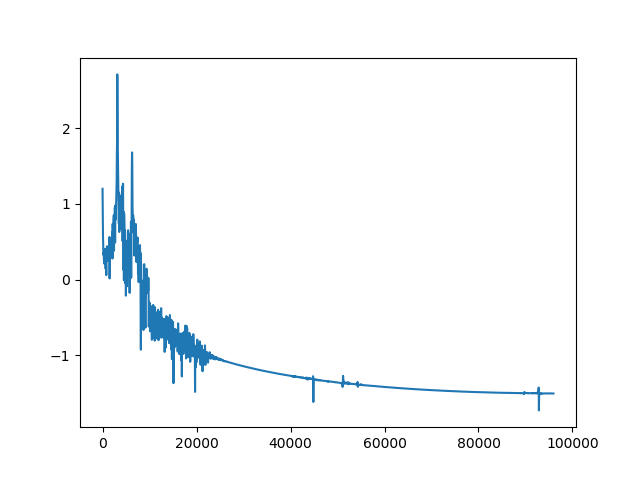

In [11]:
f5b = Figure()
f5b.plot(frequencyScale[0:4096//2], np.log10(psdSegment[0:int(4096/2)]))

Windows

<IPython.core.display.Javascript object>


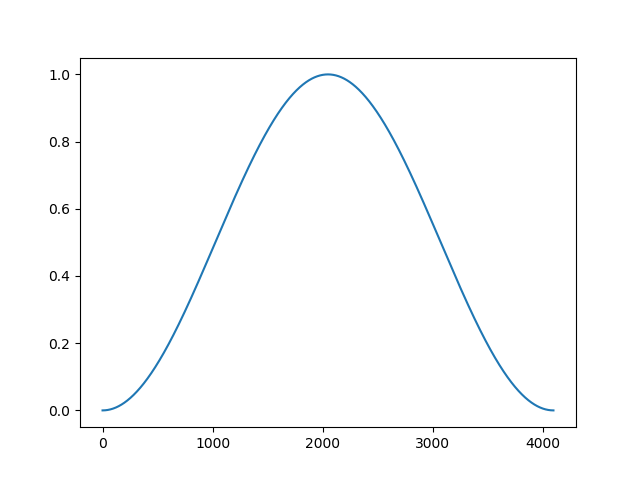

In [12]:
# We will create a Hanning window of size 4096
hanningWindow = np.hanning(4096)
f6 = Figure()
f6.plot(hanningWindow)

<IPython.core.display.Javascript object>


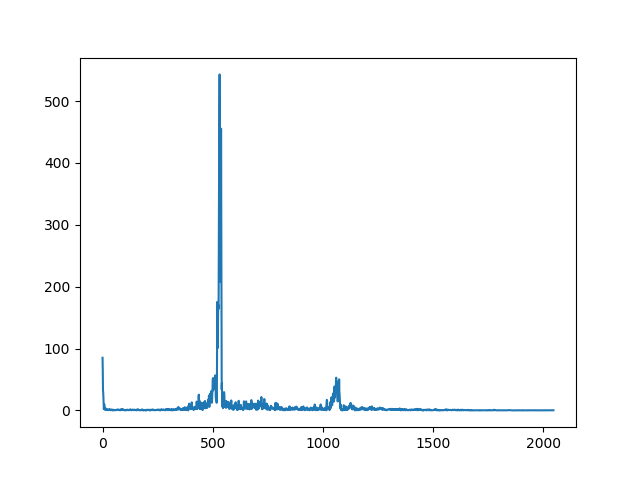

In [13]:
windowSize = 2**15
segmentWin = data[mark8s:mark8s+windowSize]
hanningWindow = np.hanning(windowSize)
fftWindowedSegment = np.fft.fft(segmentWin*hanningWindow)
psdWindowedSegment = np.absolute(fftWindowedSegment)
f7 = Figure()
f7.plot(psdWindowedSegment[0:int(4096/2)])

<IPython.core.display.Javascript object>


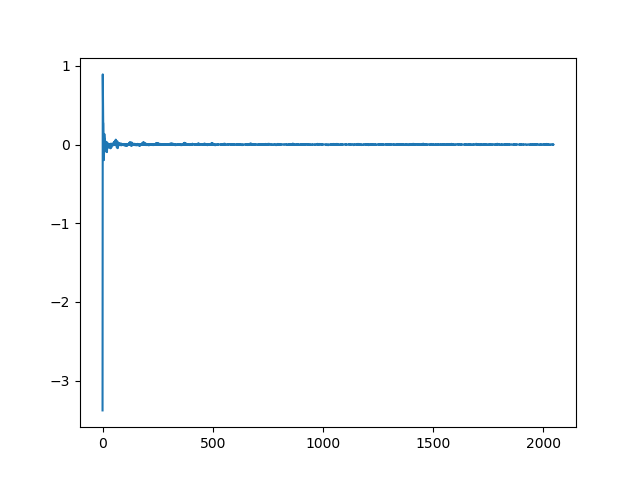

C:\Users\SOHP\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [15]:
windowSize = 2**15
segmentWin = data[mark8s:mark8s+windowSize]
hanningWindow = np.hanning(windowSize)
fftWindowedSegment = np.fft.fft(segmentWin*hanningWindow)
psdWindowedSegmentCeps = np.fft.ifft(np.log10(np.absolute(fftWindowedSegment)))
f8 = Figure()
f8.plot(psdWindowedSegmentCeps[0:int(4096/2)])